In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import csv
import pandas as pd

%matplotlib inline 

In [2]:
df_original = pd.read_csv('..\output\data\sat50_temporal_undivided.csv' , sep=',', index_col='Unnamed: 0')
df_original

,Timestamp,Connectivity,Redundancy_avg,Disparity_avg,Modularity,Criticity,RCost,Efficiency
0,0,0.96,5.592687,0.532339,-2.775558e-18,5,5012,0.555456
1,1,0.96,5.625850,0.533608,-4.785444e-19,6,5020,0.554639
2,2,0.96,5.801020,0.538186,-4.163336e-18,6,5020,0.554980
3,3,0.96,5.895408,0.540828,-5.551115e-18,5,5028,0.554667
4,4,0.96,5.982143,0.543713,-2.775558e-18,5,5022,0.555075
...,...,...,...,...,...,...,...,...
1795,1795,0.96,5.798469,0.536584,4.682132e-17,6,5016,0.555524
1796,1796,0.96,5.982143,0.543713,-2.775558e-18,5,5022,0.555075
1797,1797,0.96,5.974490,0.544536,1.413881e-17,5,5026,0.554531
1798,1798,0.96,5.974490,0.544536,1.413881e-17,5,5026,0.554531


In [3]:
df_mdrw = pd.read_csv('..\output\data\sat50_temporal_MDRW_sampled12_rep30.csv' , sep=',', index_col='Unnamed: 0')
df_mdrw

,Timestamp,Connectivity,Redundancy_avg,Disparity_avg,Modularity,Criticity,RCost,Efficiency
0,0,0.96,2.916667,0.275919,0.060176,1,308,0.727833
1,12,0.96,2.989583,0.297316,0.058354,2,308,0.724500
2,24,0.84,2.714286,0.319282,0.048392,1,250,0.655833
3,36,0.84,4.976190,0.354895,0.042554,1,260,0.634167
4,48,0.84,5.785714,0.378437,0.032002,1,278,0.609167
...,...,...,...,...,...,...,...,...
4495,1740,0.96,2.552083,0.390285,0.051537,2,334,0.701000
4496,1752,0.96,2.270833,0.335491,0.055690,2,310,0.721667
4497,1764,0.96,2.416667,0.351116,0.053877,2,322,0.707000
4498,1776,0.96,3.072917,0.300261,0.058343,1,316,0.722000


In [4]:
df_rnd = pd.read_csv('..\output\data\sat50_temporal_RND_sampled12_rep30.csv' , sep=',', index_col='Unnamed: 0')
df_rnd

,Timestamp,Connectivity,Redundancy_avg,Disparity_avg,Modularity,Criticity,RCost,Efficiency
0,0,0.960000,5.592687,0.532339,-2.775558e-18,5,5012,0.555456
1,12,0.960000,6.087585,0.552809,5.248087e-18,5,5034,0.553211
2,24,0.845714,5.669884,0.560839,-1.365395e-18,2,4080,0.513741
3,36,0.845714,6.782819,0.572776,-2.344787e-17,4,4108,0.508367
4,48,0.845714,6.779923,0.545780,-1.995802e-18,4,4178,0.504816
...,...,...,...,...,...,...,...,...
4495,1740,0.954545,6.428571,0.533960,-2.220399e-02,8,474,0.537424
4496,1752,0.954545,6.904762,0.544147,-3.070778e-02,7,460,0.538939
4497,1764,0.954545,6.876190,0.520496,-3.149598e-02,6,466,0.533182
4498,1776,0.954545,5.152381,0.467200,-2.866593e-02,6,440,0.553636


In [5]:
df_ffd = pd.read_csv('..\output\data\sat50_temporal_FFD_sampled12_rep30.csv' , sep=',', index_col='Unnamed: 0')
df_ffd

,Timestamp,Connectivity,Redundancy_avg,Disparity_avg,Modularity,Criticity,RCost,Efficiency
0,0,0.927632,1.978723,0.226878,0.115552,2,438,0.731579
1,12,0.927632,2.489362,0.284345,0.120198,2,438,0.732346
2,24,0.796053,2.231405,0.260981,0.112232,0,322,0.671053
3,36,0.796053,2.917355,0.285449,0.120332,0,330,0.662281
4,48,0.796053,2.950413,0.277116,0.113779,0,334,0.655702
...,...,...,...,...,...,...,...,...
4495,1740,0.938356,5.080292,0.407726,0.047184,4,538,0.616781
4496,1752,0.938356,3.795620,0.329323,0.063641,5,494,0.649772
4497,1764,0.938356,3.532847,0.349791,0.074580,4,490,0.657192
4498,1776,0.938356,2.437956,0.315718,0.084690,4,446,0.693493


In [6]:
mdrw = df_mdrw.groupby('Timestamp').mean()
mdrw

,Connectivity,Redundancy_avg,Disparity_avg,Modularity,Criticity,RCost,Efficiency
Timestamp,,,,,,,
0,0.960000,3.209375,0.319476,0.054844,1.833333,324.933333,0.711194
12,0.960000,3.661806,0.348885,0.051284,1.866667,329.866667,0.701000
24,0.851333,3.374864,0.368065,0.042512,0.333333,267.533333,0.644833
36,0.851333,4.124077,0.403961,0.039537,0.600000,274.800000,0.628583
48,0.851333,4.148513,0.378650,0.035382,0.933333,281.933333,0.619567
...,...,...,...,...,...,...,...
1740,0.960000,4.639583,0.397671,0.031750,2.866667,346.533333,0.667094
1752,0.960000,3.612847,0.365941,0.036443,2.400000,328.733333,0.686656
1764,0.960000,3.378819,0.353863,0.042016,2.033333,333.800000,0.686717


In [7]:
rnd = df_rnd.groupby('Timestamp').mean()
rnd

,Connectivity,Redundancy_avg,Disparity_avg,Modularity,Criticity,RCost,Efficiency
Timestamp,,,,,,,
0,0.961264,5.572910,0.532422,-0.022552,6.000000,654.266667,0.553696
12,0.961264,6.065283,0.559530,-0.023063,5.833333,657.466667,0.550831
24,0.845562,5.621409,0.568130,-0.022025,2.600000,529.466667,0.512934
36,0.845562,6.168398,0.569275,-0.021161,3.800000,530.600000,0.509139
48,0.845562,6.504424,0.545121,-0.022143,4.400000,541.466667,0.503472
...,...,...,...,...,...,...,...
1740,0.961264,7.176952,0.532545,-0.020666,6.633333,675.533333,0.544854
1752,0.961264,6.306106,0.514566,-0.022227,5.766667,648.533333,0.554434
1764,0.961264,5.733108,0.514126,-0.023798,5.566667,661.933333,0.545869


In [8]:
ffd = df_ffd.groupby('Timestamp').mean()
ffd

,Connectivity,Redundancy_avg,Disparity_avg,Modularity,Criticity,RCost,Efficiency
Timestamp,,,,,,,
0,0.948590,3.508858,0.366248,0.078425,4.100000,737.266667,0.670922
12,0.948590,3.929316,0.391041,0.077877,3.666667,741.933333,0.665924
24,0.836656,3.536856,0.403641,0.066763,1.066667,584.266667,0.614824
36,0.836656,4.161914,0.441339,0.062073,1.666667,597.000000,0.600360
48,0.836656,4.282846,0.417239,0.056026,2.100000,611.133333,0.591317
...,...,...,...,...,...,...,...
1740,0.948590,4.418489,0.408113,0.055115,3.900000,754.000000,0.648165
1752,0.948590,3.780358,0.370841,0.065682,3.233333,718.533333,0.668006
1764,0.948590,3.519581,0.367983,0.069191,4.000000,740.133333,0.661000


In [9]:
timestamps = list(rnd.index)
original = df_original.loc[timestamps].set_index('Timestamp')
original

,Connectivity,Redundancy_avg,Disparity_avg,Modularity,Criticity,RCost,Efficiency
Timestamp,,,,,,,
0,0.960000,5.592687,0.532339,-2.775558e-18,5,5012,0.555456
12,0.960000,6.087585,0.552809,5.248087e-18,6,5034,0.553211
24,0.845714,5.669884,0.560839,-1.365395e-18,3,4080,0.513741
36,0.845714,6.782819,0.572776,-2.344787e-17,5,4108,0.508367
48,0.845714,6.779923,0.545780,-1.995802e-18,5,4178,0.504816
...,...,...,...,...,...,...,...
1740,0.960000,7.096939,0.538694,5.307493e-18,8,5172,0.546163
1752,0.960000,6.019558,0.514184,1.149387e-17,6,4954,0.557986
1764,0.960000,5.527211,0.513068,-2.495375e-18,5,5052,0.550844


[Text(1, 0, 'Original'),
 Text(2, 0, 'MIRW'),
 Text(3, 0, 'RND'),
 Text(4, 0, 'FFD')]

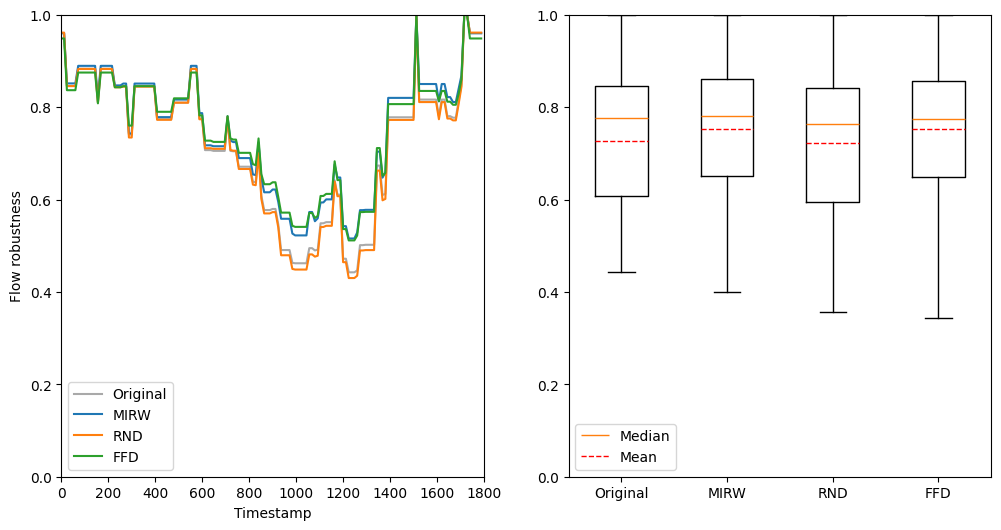

In [30]:
fig,axes = plt.subplots(figsize=(12,6), ncols=2)
idx = list(original.index)
metric = 'Connectivity'
ymax = 1

ax = axes[0]
ax.plot(idx, original[metric], label='Original', c='darkgray')
ax.plot(idx, mdrw[metric], label='MIRW')
ax.plot(idx, rnd[metric], label='RND')
ax.plot(idx, ffd[metric], label='FFD')
ax.legend()
ax.set_xlabel('Timestamp')
ax.set_ylabel('Flow robustness')
ax.set_xlim(0,1800)
ax.set_ylim(0,ymax)

ax = axes[1]
bp = ax.boxplot([df_original[metric].tolist(),   
                 df_mdrw[metric].tolist(),
                 df_rnd[metric].tolist(),
                 df_ffd[metric].tolist()], 
            vert=True, 
            widths=0.5,
            meanline=True, 
            showmeans=True, 
            meanprops={'color':'red','ls':'--'}
            )
ax.set_ylim(0,ymax)
ax.legend([bp['medians'][0], bp['means'][0]], ['Median', 'Mean'])
ax.set_xticklabels(['Original','MIRW', 'RND','FFD']) 

(0.0, 10000.0)

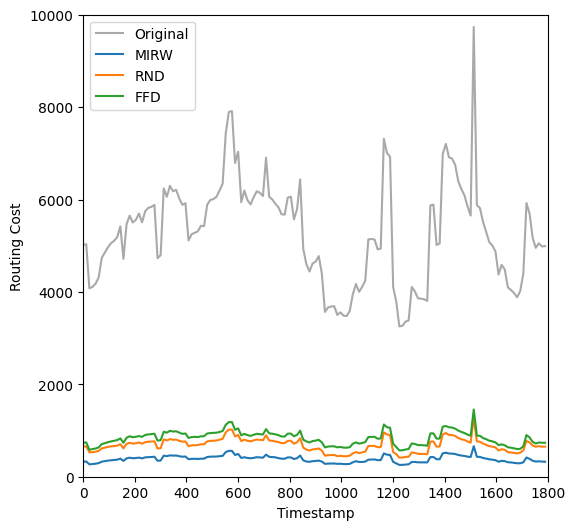

In [12]:
fig = plt.figure(figsize=(6,6))
idx = list(original.index)

plt.plot(idx, original['RCost'], label='Original', c='darkgray')
plt.plot(idx, mdrw['RCost'], label='MIRW')
plt.plot(idx, rnd['RCost'], label='RND')
plt.plot(idx, ffd['RCost'], label='FFD')
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Routing Cost')
plt.xlim(0,1800)
plt.ylim(0,10000)

(0.0, 1.0)

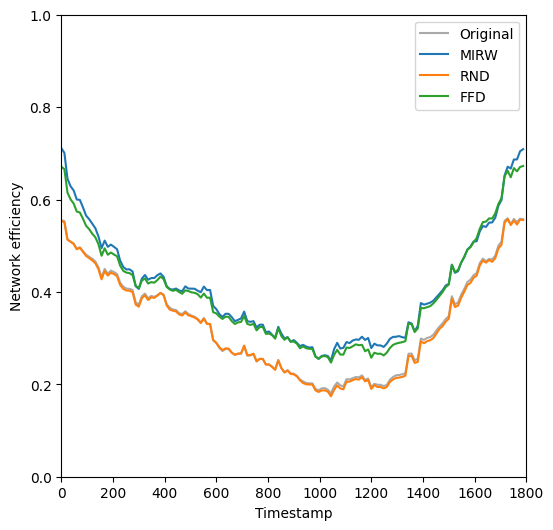

In [13]:
fig = plt.figure(figsize=(6,6))
idx = list(original.index)

plt.plot(idx, original['Efficiency'], label='Original', c='darkgray')
plt.plot(idx, mdrw['Efficiency'], label='MIRW')
plt.plot(idx, rnd['Efficiency'], label='RND')
plt.plot(idx, ffd['Efficiency'], label='FFD')
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Network efficiency')
plt.xlim(0,1800)
plt.ylim(0,1)

Text(0, 0.5, 'Network efficiency')

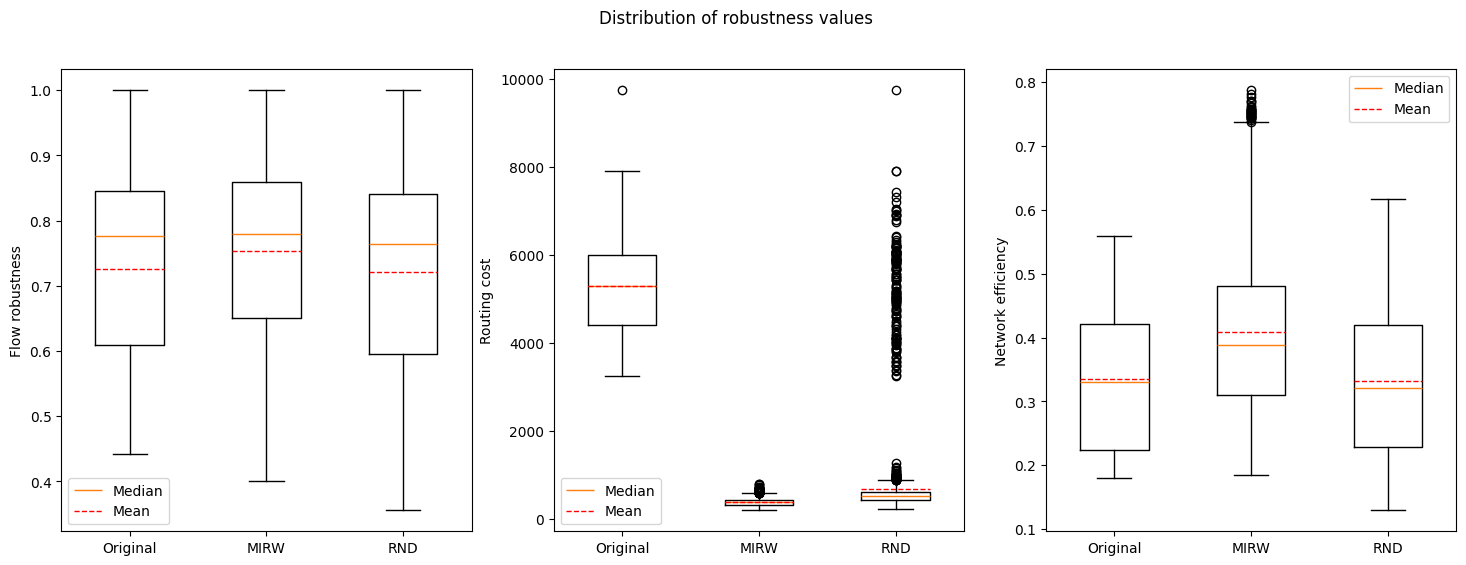

In [19]:
fig,axes = plt.subplots(figsize=(18,6), ncols=3)
fig.suptitle('Distribution of robustness values')

ax = axes[0]
bp = ax.boxplot([original['Connectivity'].tolist(),   
                 df_mdrw['Connectivity'].tolist(),
                 df_rnd['Connectivity'].tolist()], 
            vert=True, 
            widths=0.5,
            meanline=True, 
            showmeans=True, 
            meanprops={'color':'red','ls':'--'}
            )
ax.legend([bp['medians'][0], bp['means'][0]], ['Median', 'Mean'])
ax.set_xticklabels(['Original','MIRW', 'RND']) 
ax.set_ylabel('Flow robustness')

ax = axes[1]
bp = ax.boxplot([original['RCost'].tolist(),   
                 df_mdrw['RCost'].tolist(),
                 df_rnd['RCost'].tolist()], 
            vert=True, 
            widths=0.5,
            meanline=True, 
            showmeans=True, 
            meanprops={'color':'red','ls':'--'}
            )
ax.legend([bp['medians'][0], bp['means'][0]], ['Median', 'Mean'])
ax.set_xticklabels(['Original','MIRW', 'RND']) 
ax.set_ylabel('Routing cost')

ax = axes[2]
bp = ax.boxplot([original['Efficiency'].tolist(),   
                 df_mdrw['Efficiency'].tolist(),
                 df_rnd['Efficiency'].tolist()], 
            vert=True, 
            widths=0.5,
            meanline=True, 
            showmeans=True, 
            meanprops={'color':'red','ls':'--'}
            )
ax.legend([bp['medians'][0], bp['means'][0]], ['Median', 'Mean'])
ax.set_xticklabels(['Original','MIRW', 'RND']) 
ax.set_ylabel('Network efficiency')

(0.0, 1.0)

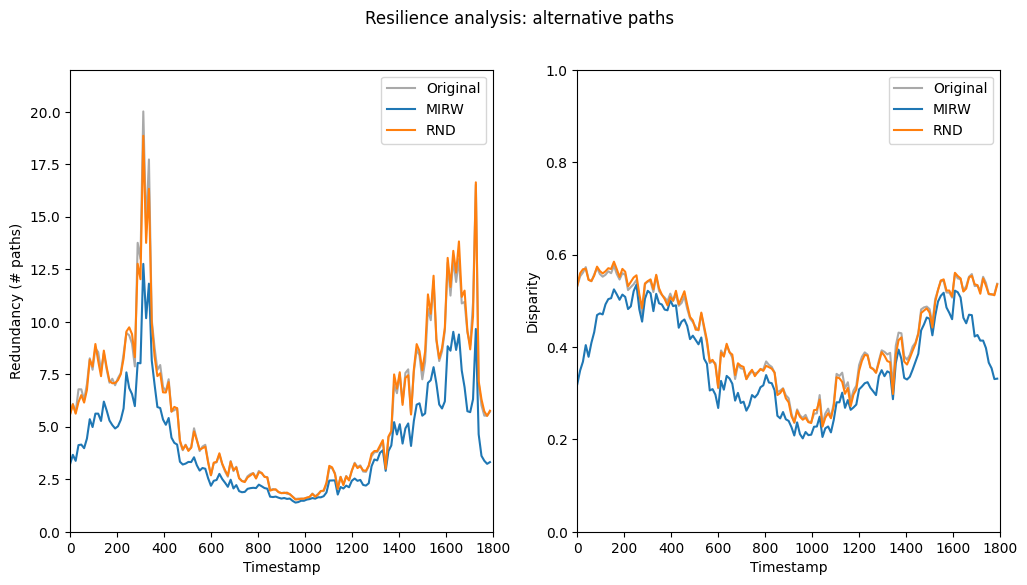

In [15]:
fig, axes = plt.subplots(figsize=(12,6), ncols=2)
idx = list(original.index)
fig.suptitle('Resilience analysis: alternative paths')

ax = axes[0]
ax.plot(idx, original['Redundancy_avg'], label='Original', c='darkgray')
ax.plot(idx, mdrw['Redundancy_avg'], label='MIRW')
ax.plot(idx, rnd['Redundancy_avg'], label='RND')
ax.legend()
ax.set_xlabel('Timestamp')
ax.set_ylabel('Redundancy (# paths)')
ax.set_xlim(0,1800)
ax.set_ylim(0,22)

ax = axes[1]
ax.plot(idx, original['Disparity_avg'], label='Original', c='darkgray')
ax.plot(idx, mdrw['Disparity_avg'], label='MIRW')
ax.plot(idx, rnd['Disparity_avg'], label='RND')
ax.legend()
ax.set_xlabel('Timestamp')
ax.set_ylabel('Disparity')
ax.set_xlim(0,1800)
ax.set_ylim(0,1)

Text(0, 0.5, 'Disparity')

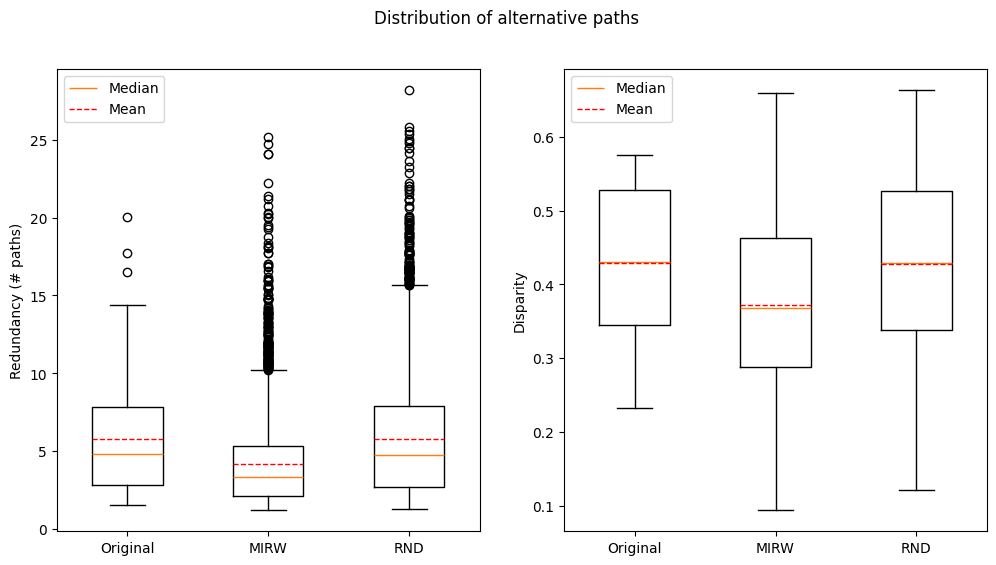

In [20]:
fig,axes = plt.subplots(figsize=(12,6), ncols=2)
fig.suptitle('Distribution of alternative paths')

ax = axes[0]
bp = ax.boxplot([original['Redundancy_avg'].tolist(),   
                 df_mdrw['Redundancy_avg'].tolist(),
                 df_rnd['Redundancy_avg'].tolist()], 
            vert=True, 
            widths=0.5,
            meanline=True, 
            showmeans=True, 
            meanprops={'color':'red','ls':'--'}
            )
ax.legend([bp['medians'][0], bp['means'][0]], ['Median', 'Mean'])
ax.set_xticklabels(['Original','MIRW', 'RND']) 
ax.set_ylabel('Redundancy (# paths)')

ax = axes[1]
bp = ax.boxplot([original['Disparity_avg'].tolist(),   
                 df_mdrw['Disparity_avg'].tolist(),
                 df_rnd['Disparity_avg'].tolist()], 
            vert=True, 
            widths=0.5,
            meanline=True, 
            showmeans=True, 
            meanprops={'color':'red','ls':'--'}
            )
ax.legend([bp['medians'][0], bp['means'][0]], ['Median', 'Mean'])
ax.set_xticklabels(['Original','MIRW', 'RND']) 
ax.set_ylabel('Disparity')

(0.0, 22.0)

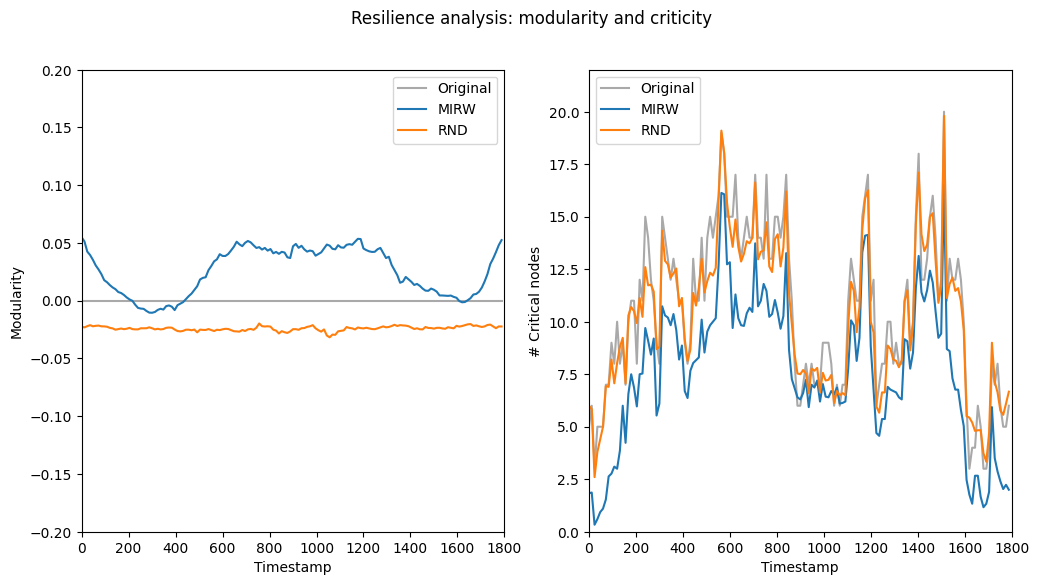

In [17]:
fig, axes = plt.subplots(figsize=(12,6), ncols=2)
idx = list(original.index)
fig.suptitle('Resilience analysis: modularity and criticity')

ax = axes[0]
ax.plot(idx, original['Modularity'], label='Original', c='darkgray')
ax.plot(idx, mdrw['Modularity'], label='MIRW')
ax.plot(idx, rnd['Modularity'], label='RND')
ax.legend()
ax.set_xlabel('Timestamp')
ax.set_ylabel('Modularity')
ax.set_xlim(0,1800)
ax.set_ylim(-0.2,0.2)

ax = axes[1]
ax.plot(idx, original['Criticity'], label='Original', c='darkgray')
ax.plot(idx, mdrw['Criticity'], label='MIRW')
ax.plot(idx, rnd['Criticity'], label='RND')
ax.legend()
ax.set_xlabel('Timestamp')
ax.set_ylabel('# Critical nodes')
ax.set_xlim(0,1800)
ax.set_ylim(0,22)

Text(0, 0.5, '# Critical nodes')

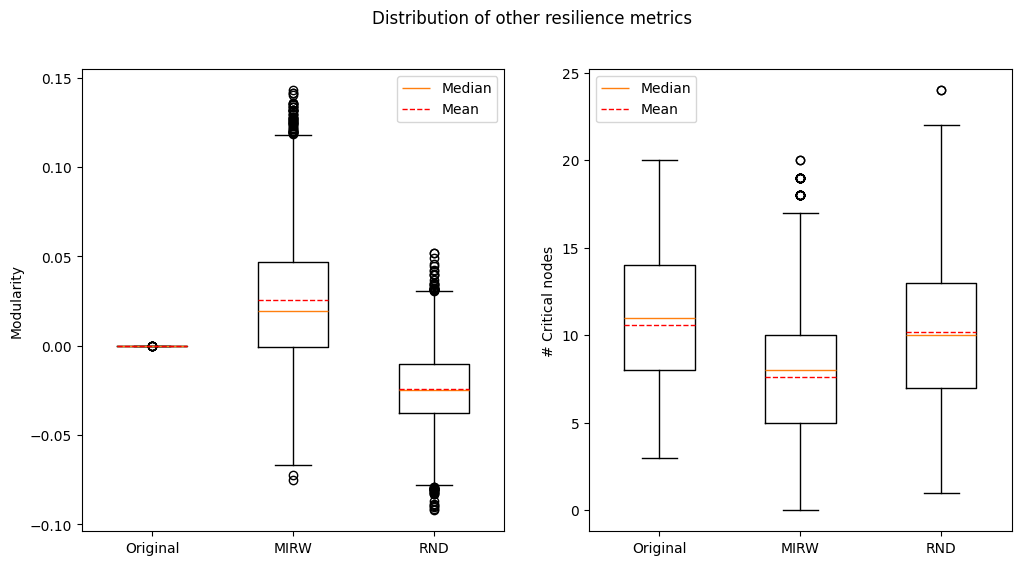

In [21]:
fig,axes = plt.subplots(figsize=(12,6), ncols=2)
fig.suptitle('Distribution of other resilience metrics')

ax = axes[0]
bp = ax.boxplot([original['Modularity'].tolist(),   
                 df_mdrw['Modularity'].tolist(),
                 df_rnd['Modularity'].tolist()], 
            vert=True, 
            widths=0.5,
            meanline=True, 
            showmeans=True, 
            meanprops={'color':'red','ls':'--'}
            )
ax.legend([bp['medians'][0], bp['means'][0]], ['Median', 'Mean'])
ax.set_xticklabels(['Original','MIRW', 'RND']) 
ax.set_ylabel('Modularity')

ax = axes[1]
bp = ax.boxplot([original['Criticity'].tolist(),   
                 df_mdrw['Criticity'].tolist(),
                 df_rnd['Criticity'].tolist()], 
            vert=True, 
            widths=0.5,
            meanline=True, 
            showmeans=True, 
            meanprops={'color':'red','ls':'--'}
            )
ax.legend([bp['medians'][0], bp['means'][0]], ['Median', 'Mean'])
ax.set_xticklabels(['Original','MIRW', 'RND']) 
ax.set_ylabel('# Critical nodes')

In [37]:
# Correlated variables in MIRW:
# Redundancy: [Disparity, Modularity]
# Connectivity: [RCost, Efficiency]
# Disparity: [Redundancy, Modularity, RCost]
# Modularity: [Disparity, Redundancy]
# Criticity: [RCost]
# RCost: [Connectivity, Disparity, Criticity]
# Efficiency: [Connectivity]

In [31]:
variables = ['Redundancy_avg', 'Connectivity', 'Disparity_avg', 'Modularity', 'Criticity', 'RCost', 'Efficiency']

In [37]:
#df_original = df_original.set_index('Timestamp')
df_original.head()

,Connectivity,Redundancy_avg,Disparity_avg,Modularity,Criticity,RCost,Efficiency
Timestamp,,,,,,,
0,0.96,5.592687,0.532339,-2.775558e-18,5,5012,0.555456
1,0.96,5.625850,0.533608,-4.785444e-19,6,5020,0.554639
2,0.96,5.801020,0.538186,-4.163336e-18,6,5020,0.554980
3,0.96,5.895408,0.540828,-5.551115e-18,5,5028,0.554667
4,0.96,5.982143,0.543713,-2.775558e-18,5,5022,0.555075


In [41]:
df_mdrw = df_mdrw.set_index('Timestamp')

In [42]:
df_mdrw.corr()

,Connectivity,Redundancy_avg,Disparity_avg,Modularity,Criticity,RCost,Efficiency
Connectivity,1.000000,0.503319,0.620691,-0.253730,-0.094715,0.429782,0.849433
Redundancy_avg,0.503319,1.000000,0.720071,-0.499191,-0.068292,0.232664,0.388826
Disparity_avg,0.620691,0.720071,1.000000,-0.628888,-0.134715,0.225883,0.478311
Modularity,-0.253730,-0.499191,-0.628888,1.000000,-0.097955,-0.276414,-0.034299
Criticity,-0.094715,-0.068292,-0.134715,-0.097955,1.000000,0.782368,-0.535045
RCost,0.429782,0.232664,0.225883,-0.276414,0.782368,1.000000,-0.074817
Efficiency,0.849433,0.388826,0.478311,-0.034299,-0.535045,-0.074817,1.000000


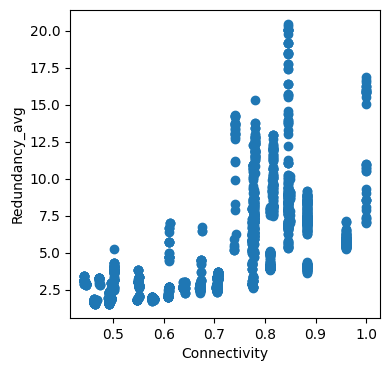

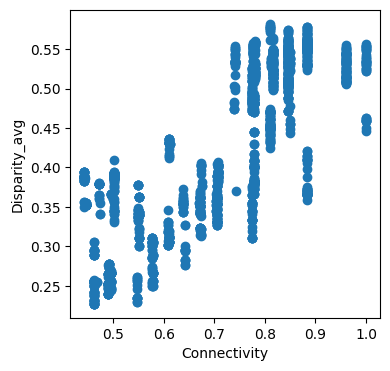

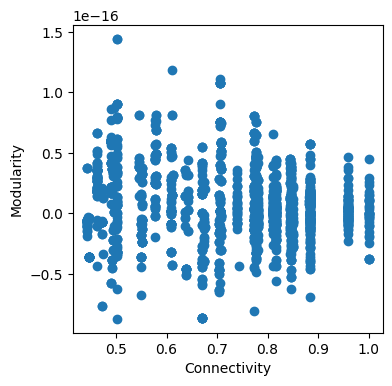

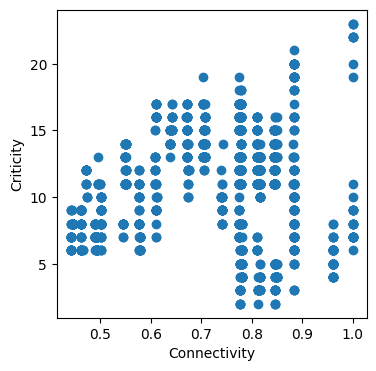

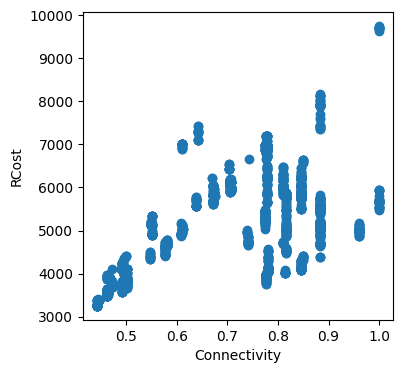

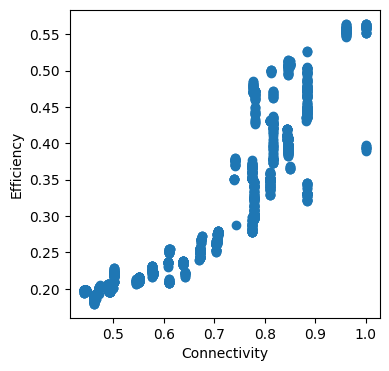

In [32]:
metric = 'Connectivity'
for var in variables:
    if var != metric:
        plt.figure(figsize=(4,4))
        plt.scatter(df_original[metric], df_original[var])
        plt.xlabel(metric)
        plt.ylabel(var)